<a href="https://colab.research.google.com/github/pedrosena138/if1014-data-mining/blob/main/SMD_Ensemble_of_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Random Forest Classification
import pandas
from sklearn import tree
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

#definindo o nome dos atributos/colunas
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#carregando os dados
dataframe = pandas.read_csv("pima-indians-diabetes.csv", names=names)

#dimensoes da base de dados
print(dataframe.shape)

#convertendo os valores da base para array
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

#semente de numeros aleatorios
seed = 7
num_trees = 15
max_features = 6

#[3 5 7 8 10 20 50 100 500]
#divisao dos dados
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=seed)

#numero de folds atraves do metodo k-fold
kfold = model_selection.StratifiedKFold(n_splits=10)

#criando o classificador Random Forest
model_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=seed)

#treinamento do Random Forest em dez folds
results = model_selection.cross_val_score(model_rf, X_train, y_train, cv=kfold)

model_rf = model_rf.fit(X_train,y_train)

print("Random Forest folds:", results, "\nMedia treinamento: " ,results.mean())
print("Treinamento: ", model_rf.score(X_train,y_train))
print("Teste: ", model_rf.score(X_test,y_test))

#criando a arvore de decisao
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=seed)

#treinamento da arvores de decisao em dez folds
results = model_selection.cross_val_score(clf, X_train, y_train, cv=kfold)
clf = clf.fit(X_train,y_train)

print("\nDecision Tree folds", results, "\nMedia treinamento: ",results.mean())
print("Treinamento: ", clf.score(X_train,y_train))
print("Teste: ", clf.score(X_test,y_test))


(768, 9)
Random Forest folds: [0.83333333 0.64814815 0.83333333 0.75925926 0.64814815 0.75925926
 0.7962963  0.79245283 0.77358491 0.67924528] 
Media treinamento:  0.7523060796645702
Treinamento:  0.9981378026070763
Teste:  0.7445887445887446

Decision Tree folds [0.75925926 0.64814815 0.7037037  0.7037037  0.64814815 0.72222222
 0.85185185 0.77358491 0.71698113 0.66037736] 
Media treinamento:  0.7187980433263452
Treinamento:  1.0
Teste:  0.7359307359307359


In [ ]:
#Comitê com votação entre os classificadores com AdaBoostClassifier
import numpy as np
import pandas
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import tree
seed = 1075
np.random.seed(seed)

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv("pima-indians-diabetes.csv", names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# Create classifiers
dt = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=seed)
svc = SVC(probability=True, kernel='linear', random_state=seed)

#training ensembles of classifiers
clf_array = [dt, svc]
for clf in clf_array:
    pima_scores = cross_val_score(clf, X, Y, cv=10)
    boosting_clf = AdaBoostClassifier(base_estimator=clf, n_estimators=6, random_state=seed)
    boosting_scores = cross_val_score(boosting_clf, X, Y, cv=10)    
    print('Media clf ',pima_scores.mean(), 'Desvio ',pima_scores.std(), 'Media Bagging',boosting_scores.mean(), 'Desvio ',boosting_scores.std())

Media clf  0.7382604237867396 Desvio  0.03663332089093633 Media Bagging 0.7187799043062201 Desvio  0.060208799319956756
Media clf  0.7669685577580314 Desvio  0.03338716735131549 Media Bagging 0.6588345864661653 Desvio  0.01654312742219658


In [ ]:
# Get some classifiers to evaluate with BaggingClassifier
import numpy as np
import pandas
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

seed = 1075
np.random.seed(seed)

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv("pima-indians-diabetes.csv", names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# Create base classifiers
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC(kernel='linear')
rg = RidgeClassifier()

#training ensembles of classifiers
clf_array = [rf, knn, svc, rg]
for clf in clf_array:
    pima_scores = cross_val_score(clf, X, Y, cv=10)
    bagging_clf = BaggingClassifier(clf,max_samples=0.3, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X, Y, cv=10)    
    print('Media clf ',pima_scores.mean(), 'Desvio ',pima_scores.std(), 'Media Bagging',bagging_scores.mean(), 'Desvio ',bagging_scores.std())

Media clf  0.7617224880382775 Desvio  0.049688240527885306 Media Bagging 0.7617395762132604 Desvio  0.04877493503738191
Media clf  0.7213773069036227 Desvio  0.04416817250533367 Media Bagging 0.7474538619275461 Desvio  0.03919108390131277
Media clf  0.7669685577580314 Desvio  0.03338716735131549 Media Bagging 0.7695830485304171 Desvio  0.029390886031526838
Media clf  0.7734962406015038 Desvio  0.03417526057730609 Media Bagging 0.7721633629528366 Desvio  0.03128714178833154


In [ ]:
# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv("pima-indians-diabetes.csv", names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 5
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(kernel='linear')
estimators.append(('svm', model3))

#train


# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.7721633629528367


>rf 0.917 (0.027)
>knn 0.931 (0.025)
>cart 0.827 (0.040)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.964 (0.020)


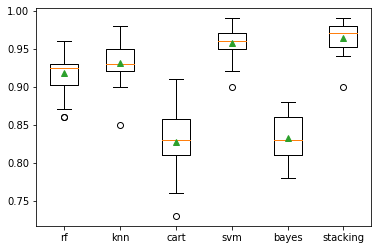

In [ ]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

#get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# #get a stacking ensemble of models
# def get_stacking():
# 	# define the base models
# 	level0 = list()
# 	level0.append(('rf', RandomForestClassifier()))
# 	level0.append(('knn', KNeighborsClassifier()))
# 	level0.append(('cart', DecisionTreeClassifier()))
# 	level0.append(('svm', SVC()))
# 	level0.append(('bayes', GaussianNB()))
# 	level0.append(('lvqq', algorithms.LVQ(n_inputs=7, n_classes=2)))
# 	# define meta learner model
# 	level1 = KNeighborsClassifier()
# 	# define the stacking ensemble
# 	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# 	return model

# def get_stacking():
# 	# define the base models
# 	level0 = list()
# 	level0.append(('knnn', KNeighborsClassifier()))
# 	level0.append(('arvore', DecisionTreeClassifier()))
# 	level0.append(('svc', SVC()))
# 	level0.append(('lvqq', algorithms.LVQ(n_inputs=7, n_classes=2)))
#   level0.append(('rf', RandomForestClassifier()))
# 	# define meta learner model
#   level1 = LogisticRegression()
# 	# define the stacking ensemble
#   model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# 	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['rf'] = RandomForestClassifier()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	#models['lvqq'] = algorithms.LVQ(n_inputs=7, n_classes=2)
	models['stacking'] = get_stacking()
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()